=== Simulating Chosen Plaintext Attack (CPA) ===

=== CPA Analysis ===
=== Pattern Analysis ===
Total blocks: 512
Unique blocks: 512
Repeated blocks: 0
No repeated blocks detected.

=== Entropy Test ===
Shannon Entropy: 7.9793 (Max: 8.0000)
Ciphertexts appear random.


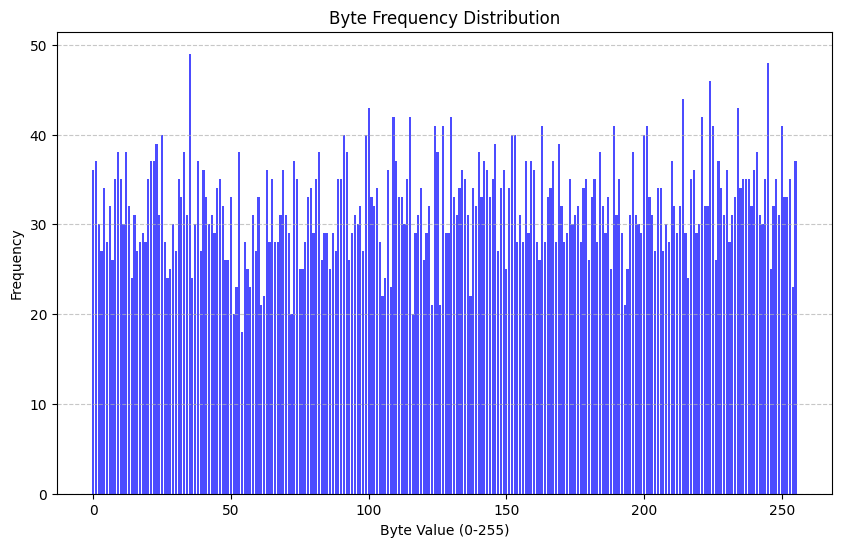


=== Chi-Square Test ===
Chi-Square Statistic: 233.5000, p-value: 0.8291
Ciphertext byte distribution appears uniform.


In [1]:
import os
import math
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad, unpad
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chisquare

# Function to generate AES ciphertext for given plaintexts
def encrypt_plaintexts(key, plaintexts, mode=AES.MODE_ECB, iv=None):
    cipher = AES.new(key, mode, iv) if iv else AES.new(key, mode)
    ciphertexts = [cipher.encrypt(pad(plaintext, AES.block_size)) for plaintext in plaintexts]
    return ciphertexts

# Function to analyze ciphertexts for patterns
def analyze_ciphertext_patterns(ciphertexts):
    block_size = 16  # AES block size
    blocks = [ciphertext[i:i + block_size] for ciphertext in ciphertexts for i in range(0, len(ciphertext), block_size)]
    unique_blocks = set(blocks)
    repetition_count = len(blocks) - len(unique_blocks)

    print(f"=== Pattern Analysis ===")
    print(f"Total blocks: {len(blocks)}")
    print(f"Unique blocks: {len(unique_blocks)}")
    print(f"Repeated blocks: {repetition_count}")

    if repetition_count > 0:
        print("Pattern detected: Repeated blocks found!")
    else:
        print("No repeated blocks detected.")

# Function to calculate Shannon entropy
def calculate_entropy(data):
    counter = Counter(data)
    total_length = len(data)
    entropy = -sum((count / total_length) * math.log2(count / total_length) for count in counter.values())
    return entropy

# Function to test entropy and plot distribution
def test_ciphertext_entropy(ciphertexts):
    combined_ciphertext = b"".join(ciphertexts)
    entropy = calculate_entropy(combined_ciphertext)
    print(f"\n=== Entropy Test ===")
    print(f"Shannon Entropy: {entropy:.4f} (Max: {math.log2(256):.4f})")

    if entropy < 7.8:
        print("Warning: Ciphertexts may not be sufficiently random!")
    else:
        print("Ciphertexts appear random.")

    # Plotting byte frequency distribution
    byte_counts = Counter(combined_ciphertext)
    byte_values = list(range(256))
    frequencies = [byte_counts[byte] for byte in byte_values]

    plt.figure(figsize=(10, 6))
    plt.bar(byte_values, frequencies, color="blue", alpha=0.7)
    plt.title("Byte Frequency Distribution")
    plt.xlabel("Byte Value (0-255)")
    plt.ylabel("Frequency")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

# Function to perform chi-square test on ciphertexts
def chi_square_test_ciphertexts(ciphertexts):
    combined_ciphertext = b"".join(ciphertexts)
    byte_counts = [0] * 256
    for byte in combined_ciphertext:
        byte_counts[byte] += 1

    expected = [len(combined_ciphertext) / 256] * 256
    chi2, p = chisquare(byte_counts, expected)
    print(f"\n=== Chi-Square Test ===")
    print(f"Chi-Square Statistic: {chi2:.4f}, p-value: {p:.4f}")

    if p < 0.05:
        print("Warning: Ciphertext byte distribution is not uniform!")
    else:
        print("Ciphertext byte distribution appears uniform.")

# Function to simulate chosen plaintext attack
def simulate_cpa_analysis(key, mode=AES.MODE_CBC, iv=None):
    # Generate chosen plaintexts
    plaintexts = [bytes([i] * 16) for i in range(256)]  # Plaintexts with repeating byte values
    ciphertexts = encrypt_plaintexts(key, plaintexts, mode, iv)

    print(f"\n=== CPA Analysis ===")
    analyze_ciphertext_patterns(ciphertexts)
    test_ciphertext_entropy(ciphertexts)
    chi_square_test_ciphertexts(ciphertexts)

# Main function
if __name__ == "__main__":
    # Define the key and IV (Initialization Vector)
    key = os.urandom(16)  # Random 16-byte key
    iv = os.urandom(16)   # Random IV for CBC mode

    # Simulate CPA on AES encryption
    print("=== Simulating Chosen Plaintext Attack (CPA) ===")
    simulate_cpa_analysis(key, mode=AES.MODE_CBC, iv=iv)  # Test CBC mode